<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#MAE" data-toc-modified-id="MAE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>MAE</a></span></li><li><span><a href="#Распределение-концентрации-металлов-на-различных-ступенях-обработки" data-toc-modified-id="Распределение-концентрации-металлов-на-различных-ступенях-обработки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение концентрации металлов на различных ступенях обработки</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-этапах-очистки" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-этапах-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных этапах очистки</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
dfs = [df_train,df_test,df_full]
for df in dfs:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [3]:
for df in dfs:
    print(df.duplicated().sum())

0
0
0


In [4]:
for df in dfs:
    print(df.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [5]:
for df in dfs:
    print(df.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 16788.000000                 16788.000000   
mean                      4.716907                     9.113559   
std                       2.096718                     3.389495   
min                       0.000000                     0.000000   
25%                       3.971262                     8.825748   
50%                       4.869346                    10.065316   
75%                       5.821176                    11.054809   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  16490.000000                 16789.000000   
mean                       8.301123                    39.467217   
std                        3.825760                    13.917227   
min                        0.000000                     0.000000   
25%                        6.939185                    4

In [6]:
only_train = set(df_full.columns) - set(df_test.columns)
only_train

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В приготовленной для нас тествой выборке отсутствуют столбцы, содержащие информацию о состоянии продукта после этапов флотации и очисток, а также содержащие расчетные характеристики и целевые значения эффективности обогащения.  

## Анализ данных  
### MAE

In [7]:
columns_for_mae = ['rougher.output.recovery',
           'rougher.output.concentrate_au',
           'rougher.input.feed_au',
           'rougher.output.tail_au']

df_check = df_train[columns_for_mae].dropna()
C = df_check['rougher.output.concentrate_au']
F = df_check['rougher.input.feed_au']
T = df_check['rougher.output.tail_au']
recovery = (C * (F-T)) / (F * (C - T)) * 100
mae(df_check['rougher.output.recovery'], recovery)

9.444891926100695e-15

Малое среднекватратичное отклонение говорит о верности предоставленной метрики Recovery.

In [8]:
for df in dfs:
    print(df.shape)

(16860, 87)
(5856, 53)
(22716, 87)


### Распределение концентрации металлов на различных ступенях обработки  
Напишем функцию, для построения графика распределения, которая на вход требует только название металла.


In [9]:
def show_concentrate_of_metal_hist(metal, title):
    x0 = df_full[f'rougher.input.feed_{metal}'].dropna()
    x1 = df_full[f'rougher.output.concentrate_{metal}'].dropna()
    x2 = df_full[f'primary_cleaner.output.concentrate_{metal}'].dropna()
    x3 = df_full[f'final.output.concentrate_{metal}'].dropna()

    plt.figure(figsize=(12, 6))

    sb.distplot(x0, kde_kws= {"label": "Сырье"})
    sb.distplot(x1, kde_kws= {"label": "Черновой"})
    sb.distplot(x2, kde_kws= {"label": "Первичная очистка"})
    sb.distplot(x3, kde_kws= {"label": "Финальный этап"})

    plt.title(label=f'Концентрация {title} на различных этапах очистки', fontsize=15)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')

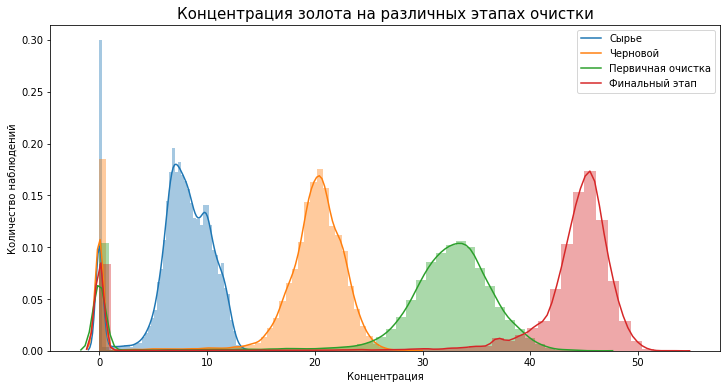

In [10]:
show_concentrate_of_metal_hist('au', 'золота')

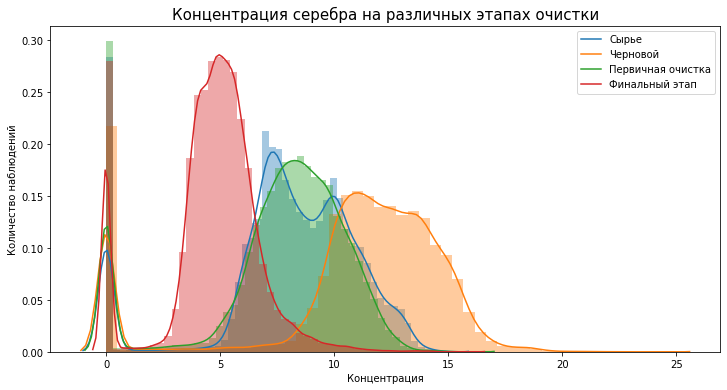

In [11]:
show_concentrate_of_metal_hist('ag', 'серебра')

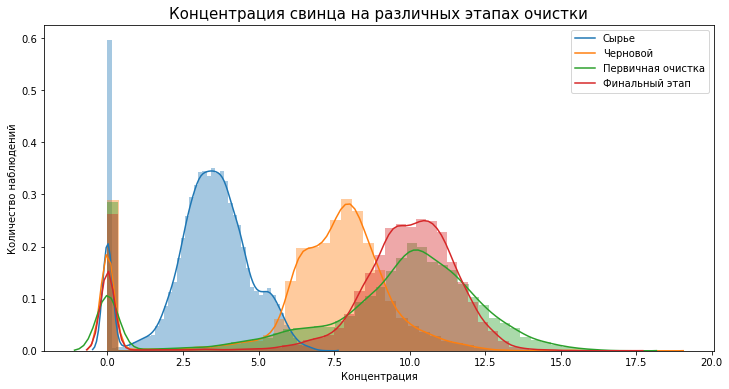

In [12]:
show_concentrate_of_metal_hist('pb', 'свинца')

__Вывод__
- Концентрация золота после каждого этапа очистки возрастает в среднем от 7 до 45%
- Концентрация серебра растет после флотации, потом падает.
- Концентрация свинца растет после первого этапа, потом меняется незначительно.

In [13]:
def show_feed_size_hist(step, title):
    x0 = df_train[f'{step}.input.feed_size'].dropna()
    x1 = df_test[f'{step}.input.feed_size'].dropna()
    plt.figure(figsize=(12, 6))
    sb.distplot(x0, kde_kws= {"label": "Train"})
    sb.distplot(x1, kde_kws= {"label": "Test"})
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=15)

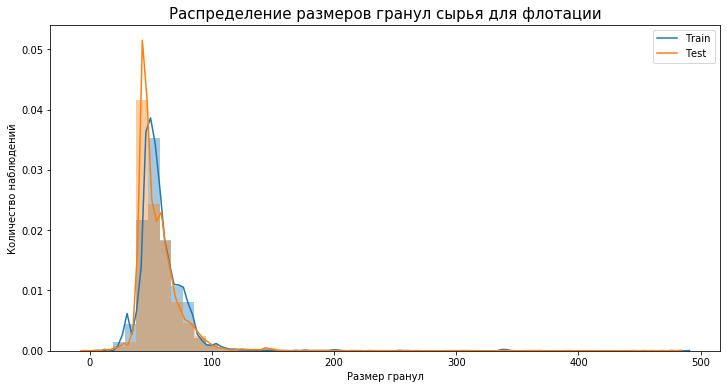

In [14]:
show_feed_size_hist('rougher', 'флотации')

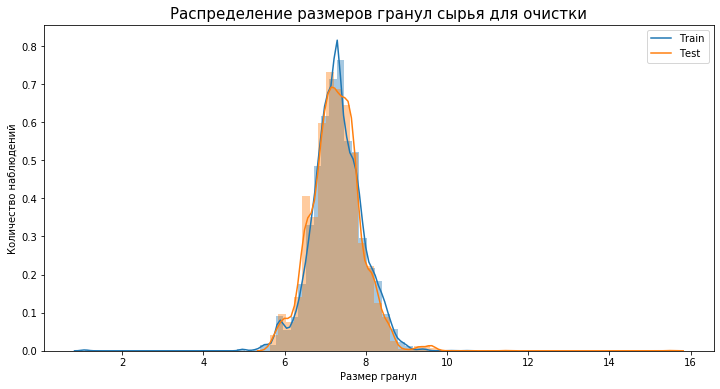

In [15]:
show_feed_size_hist('primary_cleaner', 'очистки')

__Вывод__
- Размеры гранул распределены одинаково на двух выборках, размер гранул для очистки намного меньше.

### Суммарная концентрация всех веществ на разных этапах очистки

Text(0.5, 1.0, 'Концентрация всех веществ на разных стадиях')

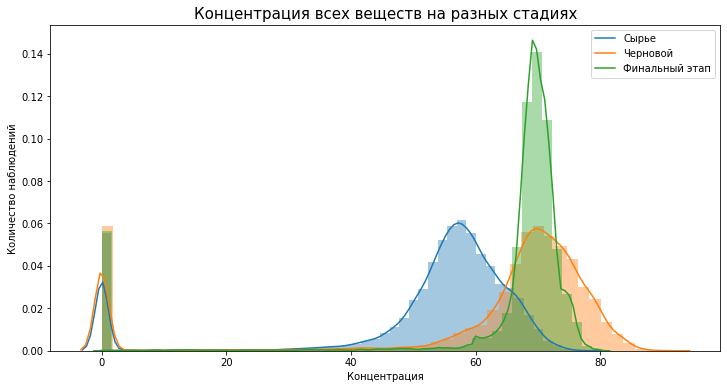

In [16]:
metals = ['au', 'ag', 'pb', 'sol']
steps = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']
for step in steps:
    df_full[step] = df_full[step + metals[0]] + df_full[step + metals[1]] + df_full[step + metals[2]] + df_full[step + metals[3]]
x0 = df_full['rougher.input.feed_'].dropna()
x1 = df_full['rougher.output.concentrate_'].dropna()
x2 = df_full['final.output.concentrate_'].dropna()

plt.figure(figsize=(12, 6))

sb.distplot(x0, kde_kws= {"label": "Сырье"})
sb.distplot(x1, kde_kws= {"label": "Черновой"})
sb.distplot(x2, kde_kws= {"label": "Финальный этап"})


plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=15)

В результате очистки концентрация веществ достигает 70%. Необходимо удалить строки со значениями концентраций равных нулю.

In [17]:
df = df_full[(df_full['rougher.input.feed_'] != 0) &
         (df_full['rougher.output.concentrate_'] != 0) & 
         (df_full['final.output.concentrate_'] != 0)]

Приготовим выборки. Х - признаки, у - ключевой признак в виде характеристики recovery для чернового концентрата и итогового концентрата.

In [18]:
train = df_train[df_test.columns]

test = df_test.dropna()
train = train.dropna()

test.drop(['date'], axis=1, inplace=True)
train.drop(['date'], axis=1, inplace=True)


X_train_rougher = train
X_test_rougher = test
y_train_rougher = df.loc[X_train_rougher.index, 'rougher.output.recovery']
y_test_rougher = df.loc[X_test_rougher.index,'final.output.recovery']

X_train_final = train
X_test_final = test
y_train_final = df.loc[X_train_final.index, 'final.output.recovery']
y_test_final = df.loc[X_test_final.index, 'final.output.recovery']

y_train_final = y_train_final.fillna(y_train_final.mean())
y_train_rougher = y_train_rougher.fillna(y_train_rougher.mean())

Проверим размеры выборок

In [19]:
(X_train_final.shape), (X_test_final.shape), (y_train_final.shape), (y_test_final.shape)

((13522, 52), (5383, 52), (13522,), (5383,))

In [20]:
def smape(y_target, y_pred):
    return ((1/len(y_target)) * np.sum(2 * np.abs(y_target - y_pred) / (np.abs(y_target) + np.abs(y_pred)))) * 100
smape_score = make_scorer(smape, greater_is_better=False)
rougher_median = pd.Series(y_train_rougher.median(), index=y_test_rougher.index)
final_median = pd.Series(y_train_final.median(), index=y_test_final.index)

total = (smape(y_test_final, rougher_median)*0.25) + (smape(y_test_rougher, final_median)* 0.75)
print('Итоговый smape константной модели: ', total)


Итоговый smape константной модели:  12.785100212372484


## Модель
### Дерево решений

Для каждой модели найдем ее лучшие параметры при помощи DecisionTreeRegressor. Далее обучим модель. Сделаем это для данных по черновому концентрату и по финальному концентрату. Проверим на тестовой выборке. В конце рассчитаем итоговую sMAPE. 

In [21]:
start_time = time.time()
RND = 12345
params_dtr_grid = {
    'max_depth' : range(1,6)
}
grid_decision_tree_regr_rougher = GridSearchCV(DecisionTreeRegressor(random_state=RND), param_grid = params_dtr_grid, cv=5, n_jobs=-1, scoring=smape_score) 
grid_decision_tree_regr_rougher.fit(X_train_rougher, y_train_rougher)
params_dtr_rougher = grid_decision_tree_regr_rougher.best_params_
decision_tree_regr_rougher = DecisionTreeRegressor(**params_dtr_rougher, random_state = RND)
decision_tree_regr_rougher.fit(X_train_rougher, y_train_rougher)
print('Best params for model: ', grid_decision_tree_regr_rougher.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 3}
 6.185484170913696 seconds 


In [22]:
start_time = time.time()

grid_decision_tree_regr_final = GridSearchCV(DecisionTreeRegressor(random_state=RND), param_grid = params_dtr_grid, cv=5, n_jobs=-1, scoring=smape_score) 
grid_decision_tree_regr_final.fit(X_train_final, y_train_final)
params_dtr_final = grid_decision_tree_regr_final.best_params_
decision_tree_regr_final = DecisionTreeRegressor(**params_dtr_final, random_state = RND)
decision_tree_regr_final.fit(X_train_final, y_train_final)
print('Best params for model: ', grid_decision_tree_regr_final.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 2}
 6.162619352340698 seconds 


In [23]:
pred_dtr_rough = decision_tree_regr_rougher.predict(X_test_rougher)
smape_dtr_rougher = smape(df.loc[X_test_rougher.index, 'rougher.output.recovery'], pred_dtr_rough)

pred_dtr_final = decision_tree_regr_final.predict(X_test_final)
smape_dtr_final = smape(df.loc[X_test_final.index, 'final.output.recovery'], pred_dtr_final)
smape_dtr_rougher, smape_dtr_final

(7.703072262074244, 9.276818274239172)

In [24]:
total_dtr_smape = 0.25*smape_dtr_rougher + 0.75*smape_dtr_final
total_dtr_smape

8.88338177119794

### Случайный лес


In [25]:
start_time = time.time()
param_rf_grid = {
        'max_depth' : range(4,20)}
grid_random_forest_regr_rougher = GridSearchCV(RandomForestRegressor(random_state=RND), 
                                               param_grid = param_rf_grid, 
                                               cv=5, 
                                               n_jobs=-1, 
                                               scoring=smape_score) 
grid_random_forest_regr_rougher.fit(X_train_rougher, y_train_rougher)
params_rf_rougher = grid_random_forest_regr_rougher.best_params_
random_forest_regr_rougher = RandomForestRegressor(**params_rf_rougher, random_state = RND)
random_forest_regr_rougher.fit(X_train_rougher, y_train_rougher)
print('Best params for model: ', grid_random_forest_regr_rougher.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 4}
 333.91905760765076 seconds 


In [26]:
start_time = time.time()

grid_random_forest_regr_final = GridSearchCV(RandomForestRegressor(random_state=RND), 
                                             param_grid = param_rf_grid, 
                                             cv=5, 
                                             n_jobs=-1, 
                                             scoring=smape_score) 
grid_random_forest_regr_final.fit(X_train_final, y_train_final)
params_rf_final = grid_random_forest_regr_final.best_params_
random_forest_regr_final = RandomForestRegressor(**params_rf_final, random_state = RND)
random_forest_regr_final.fit(X_train_final, y_train_final)
print('Best params for model: ', grid_random_forest_regr_final.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'max_depth': 4}
 347.93407464027405 seconds 


In [27]:
pred_rf_rough = random_forest_regr_rougher.predict(X_test_rougher)
smape_rf_rougher = smape(df.loc[X_test_rougher.index, 'rougher.output.recovery'], pred_rf_rough)

pred_rf_final = random_forest_regr_final.predict(X_test_final)
smape_rf_final = smape(df.loc[X_test_final.index, 'final.output.recovery'], pred_rf_final)
smape_rf_final, smape_rf_rougher

(9.192247596202762, 7.841028117691246)

In [28]:
total_rf_smape = 0.25*smape_rf_rougher + 0.75*smape_rf_final
total_rf_smape

8.854442726574883

### Линейная регрессия

In [29]:
start_time = time.time()

param_lr_grid = {'fit_intercept':[True, False],
             'normalize':[True, False],
             'copy_X':[True, False]}

grid_line_regr_rougher = GridSearchCV(LinearRegression(), param_grid = param_lr_grid, n_jobs=-1, cv = 5, scoring = smape_score)
grid_line_regr_rougher.fit(X_train_rougher, y_train_rougher)
params_lr_rougher = grid_line_regr_rougher.best_params_
line_regr_rougher = LinearRegression(**params_lr_rougher)
line_regr_rougher.fit(X_train_rougher, y_train_rougher)
                      
print('Best params for model: ', grid_line_regr_rougher.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
 15.825034856796265 seconds 


In [30]:
grid_line_regr_final = GridSearchCV(LinearRegression(), param_grid = param_lr_grid, n_jobs=-1, cv = 5, scoring = smape_score)
grid_line_regr_final.fit(X_train_final, y_train_final)
params_lr_final = grid_line_regr_final.best_params_
line_regr_final = LinearRegression(**params_lr_final)
line_regr_final.fit(X_train_final, y_train_final)
print('Best params for model: ', grid_line_regr_final.best_params_)

print(" %s seconds " % (time.time() - start_time))

Best params for model:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
 32.823609590530396 seconds 


In [31]:
pred_lr_rough = line_regr_rougher.predict(X_test_rougher)
smape_lr_rougher = smape(df.loc[X_test_rougher.index, 'rougher.output.recovery'], pred_lr_rough)

pred_lr_final = line_regr_final.predict(X_test_final)
smape_lr_final = smape(df.loc[X_test_final.index, 'final.output.recovery'], pred_lr_final)
smape_lr_final, smape_lr_rougher

(9.634789836874265, 8.311162361067467)

In [32]:
total_lr_smape = 0.25*smape_lr_rougher + 0.75*smape_lr_final
total_lr_smape

9.303882967922565

## Вывод

In [33]:
print('Total sMAPE разных моделей: ')
print('Дерево решений', total_dtr_smape)
print('Случайный лес', total_rf_smape)
print('Линейная регрессия', total_lr_smape) 
print('Константная модель: ', total)

Total sMAPE разных моделей: 
Дерево решений 8.88338177119794
Случайный лес 8.854442726574883
Линейная регрессия 9.303882967922565
Константная модель:  12.785100212372484


Вывод: - Случайный лес имеет лучший результат в сравнении с sMAPE константной модели: 12.7 и 8.85